In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/junyuwu/Downloads/kc_house_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
bybedrooms = df.groupby("bedrooms")["price"].mean()
bybedrooms = bybedrooms[:12]

/var/folders/tr/00d44tjd3wz1f_ccm0ktlwp80000gn/T/ipykernel_8814/1945389246.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


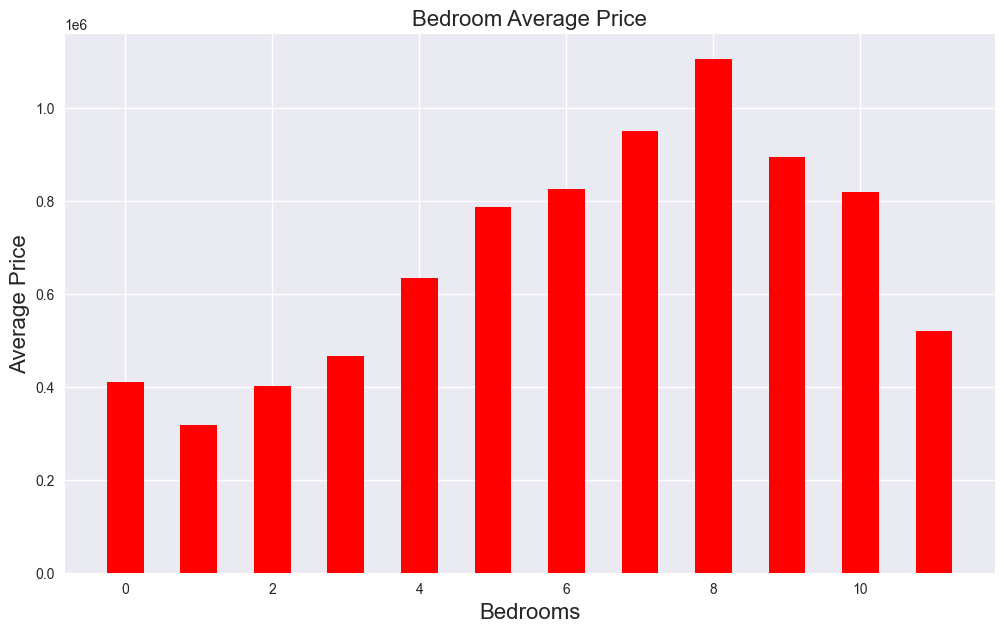

In [6]:
x_axis = bybedrooms.index
y_axis = bybedrooms
plt.figure(figsize=(12, 7))
plt.style.use('seaborn')
plt.bar(x_axis, y_axis, width=0.5, color="red")
plt.title('Bedroom Average Price',fontsize=16)
plt.xlabel('Bedrooms',fontsize=16)
plt.ylabel('Average Price',fontsize=16);

In [7]:
bybathrooms = df.groupby("bathrooms")["price"].mean()
bybathrooms

bathrooms
0.00    4.481600e+05
0.50    2.373750e+05
0.75    2.945209e+05
1.00    3.470412e+05
1.25    6.212167e+05
1.50    4.093222e+05
1.75    4.548961e+05
2.00    4.578897e+05
2.25    5.336768e+05
2.50    5.535965e+05
2.75    6.602304e+05
3.00    7.084152e+05
3.25    9.703398e+05
3.50    9.319331e+05
3.75    1.197217e+06
4.00    1.267709e+06
4.25    1.525774e+06
4.50    1.333620e+06
4.75    2.021304e+06
5.00    1.673492e+06
5.25    1.817177e+06
5.50    2.522300e+06
5.75    2.492500e+06
6.00    2.946833e+06
6.25    3.094000e+06
6.50    1.709445e+06
6.75    2.734000e+06
7.50    4.500000e+05
7.75    6.885000e+06
8.00    4.990000e+06
Name: price, dtype: float64

In [8]:
byfloors = df.groupby("floors")["price"].mean()
byfloors

floors
1.0    4.421806e+05
1.5    5.589806e+05
2.0    6.488912e+05
2.5    1.060346e+06
3.0    5.825260e+05
3.5    9.333125e+05
Name: price, dtype: float64

In [9]:
df.groupby("sqft_basement")["price"].mean()



sqft_basement
0       4.868841e+05
10      1.919000e+05
20      4.850000e+05
40      4.004250e+05
50      4.773580e+05
            ...     
3260    1.900000e+06
3480    7.700000e+06
3500    3.200000e+06
4130    2.280000e+06
4820    4.668000e+06
Name: price, Length: 306, dtype: float64

In [10]:
bybase = df.groupby("sqft_basement")["price"].mean().to_frame()
bybase.reset_index(inplace=True)
bybase

,sqft_basement,price
0,0,4.868841e+05
1,10,1.919000e+05
2,20,4.850000e+05
3,40,4.004250e+05
4,50,4.773580e+05
...,...,...
301,3260,1.900000e+06
302,3480,7.700000e+06
303,3500,3.200000e+06
304,4130,2.280000e+06


In [11]:
df.columns


Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
df.groupby("condition")["price"].mean()

condition
1    334431.666667
2    327287.145349
3    542012.578148
4    521200.390033
5    612418.089359
Name: price, dtype: float64

In [15]:
df["yr_built"].value_counts()[:10]

2014    559
2006    454
2005    450
2004    433
2003    422
2007    417
1977    417
1978    387
1968    381
2008    367
Name: yr_built, dtype: int64

In [21]:
byyear = df.groupby("yr_built")["price"].mean().sort_values(ascending=False)[:10]

yr_built
1933    772050.000000
2015    759785.157895
1905    752977.986486
2001    741030.796721
1909    696135.159574
2014    683681.754919
2000    681789.169725
2013    678545.452736
1907    676257.246154
1902    673007.407407
Name: price, dtype: float64

In [22]:
byview = df["view"].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64